In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# df["class"].unique()

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
# for label in cols[:-1]:
#   plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
#   plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
#   plt.title(label)
#   plt.ylabel("Probability")
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()

#Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
# print(len(train[train["class"]==1])) #gamma
# print(len(train[train["class"]==0])) #hadron

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#kNN(K-Nearest Neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1407
           1       0.85      0.87      0.86      2397

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.39      0.50      1407
           1       0.72      0.91      0.80      2397

    accuracy                           0.72      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.72      0.69      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1407
           1       0.83      0.83      0.83      2397

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



#SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1407
           1       0.87      0.91      0.89      2397

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                      metrics=['accuracy'])
    history = nn_model.fit(
      X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


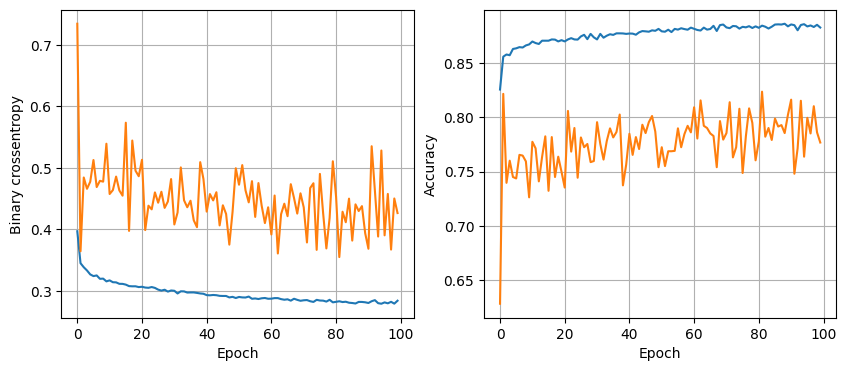

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.01, batch size 64


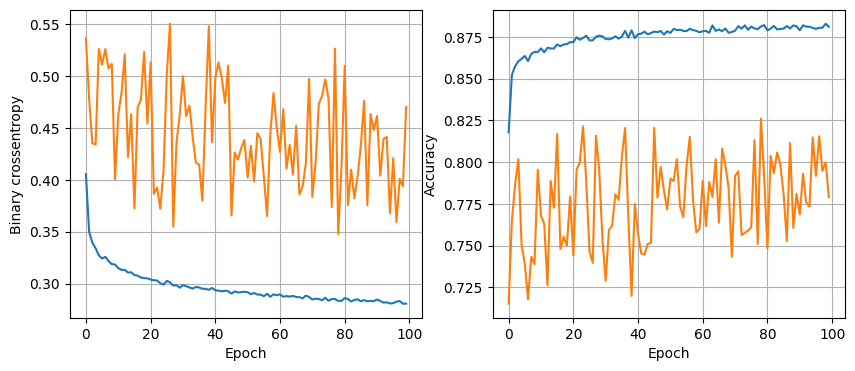

119/119 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.01, batch size 128


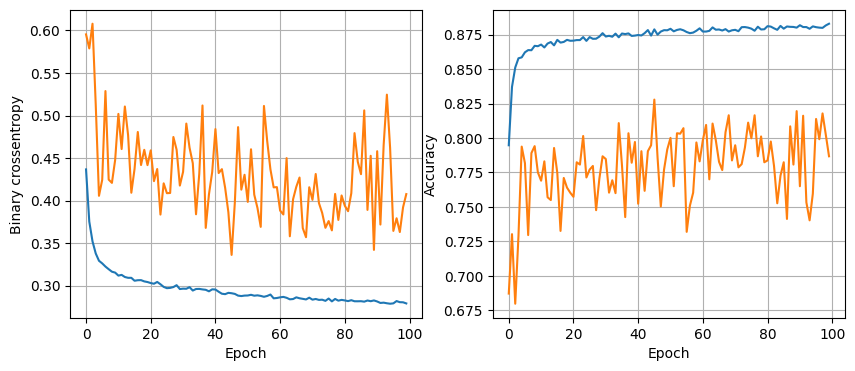

119/119 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.005, batch size 32


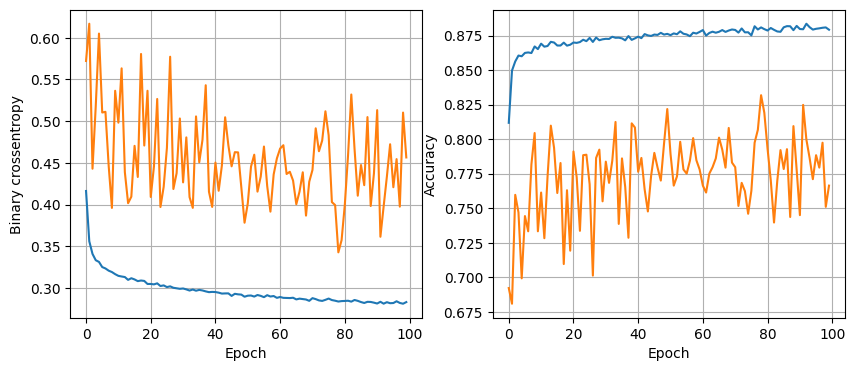

119/119 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.005, batch size 64


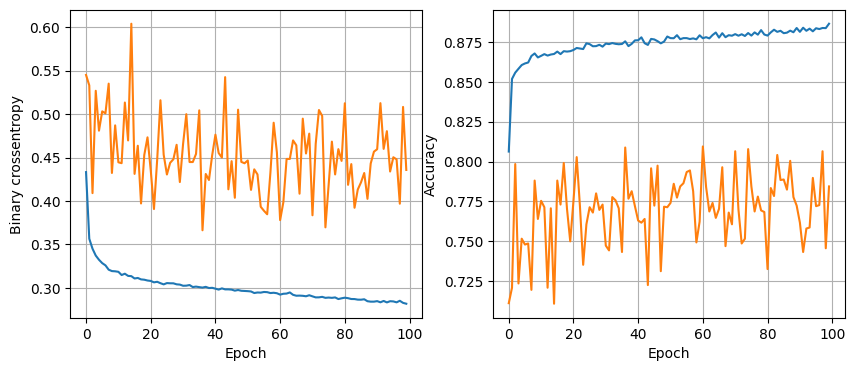

119/119 [==============================] - 1s 4ms/step - loss: 0.3111 - accuracy: 0.8770
16 nodes, dropout 0, lr 0.005, batch size 128


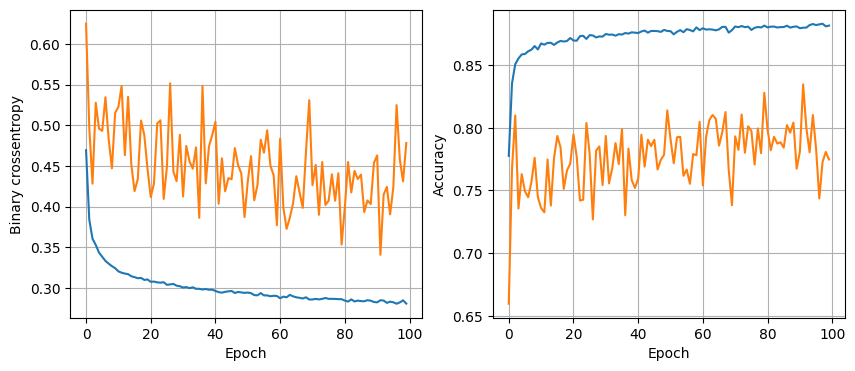

119/119 [==============================] - 0s 4ms/step - loss: 0.3092 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.001, batch size 32


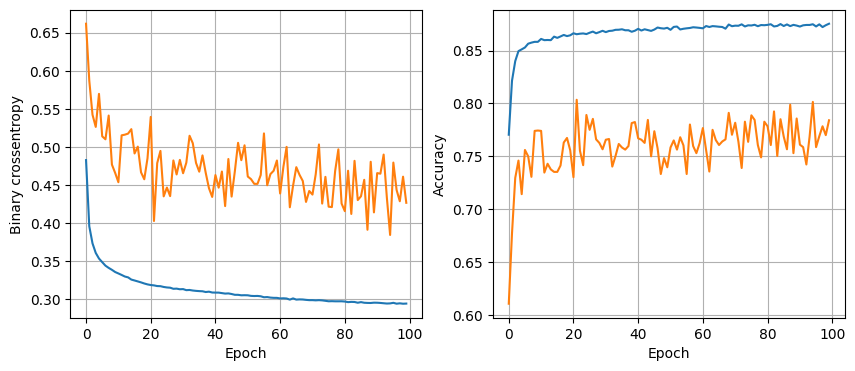

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 64


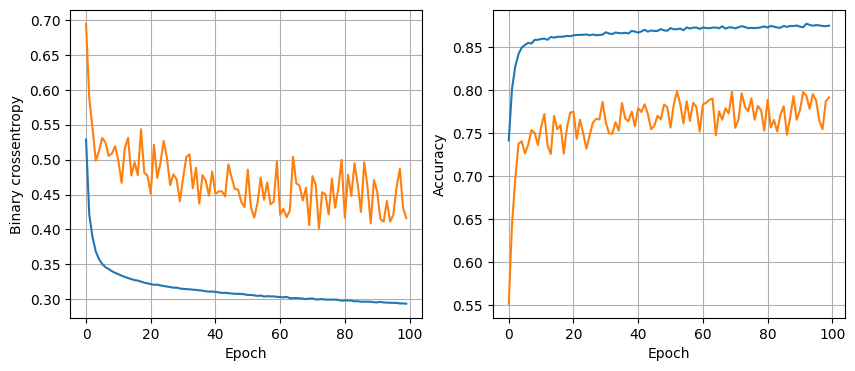

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8654
16 nodes, dropout 0, lr 0.001, batch size 128


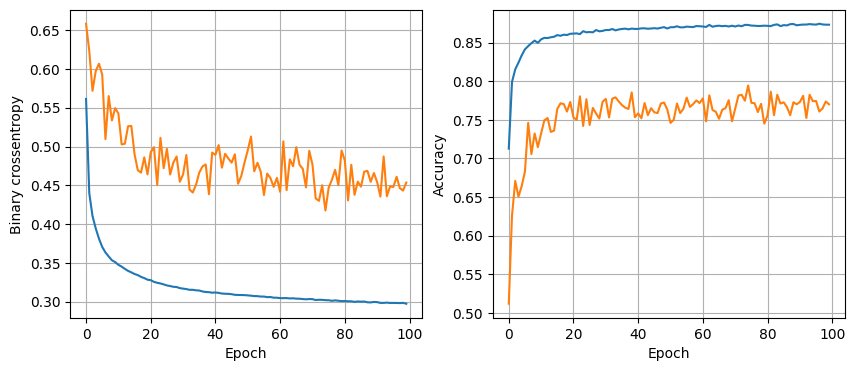

119/119 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8623
16 nodes, dropout 0.2, lr 0.01, batch size 32


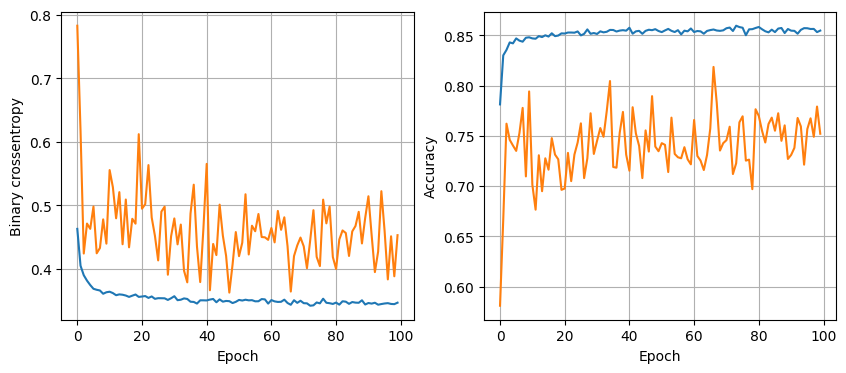

119/119 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8617
16 nodes, dropout 0.2, lr 0.01, batch size 64


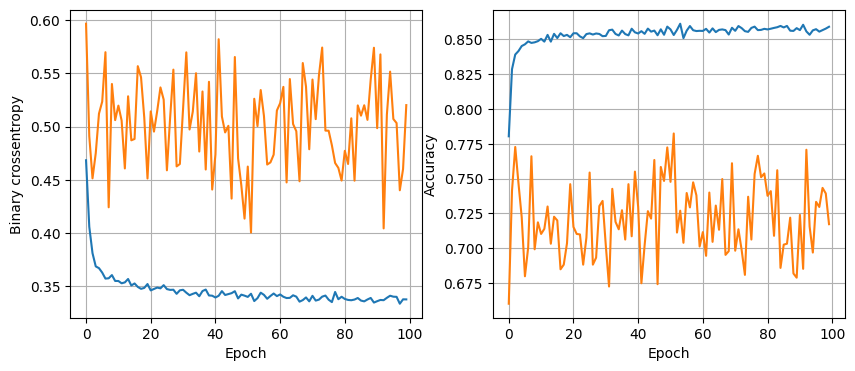

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.01, batch size 128


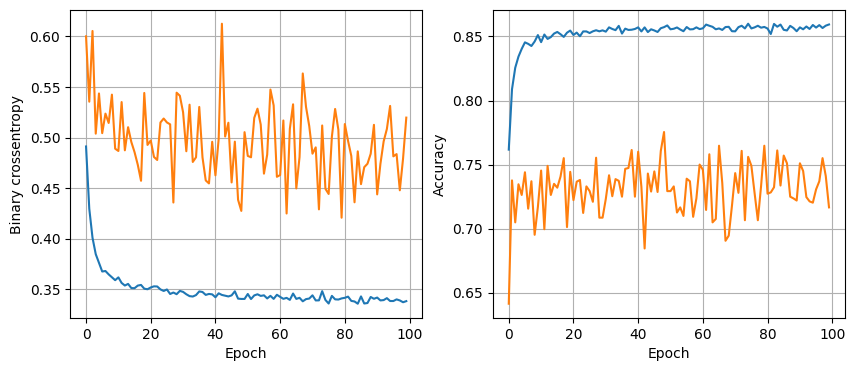

119/119 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch size 32


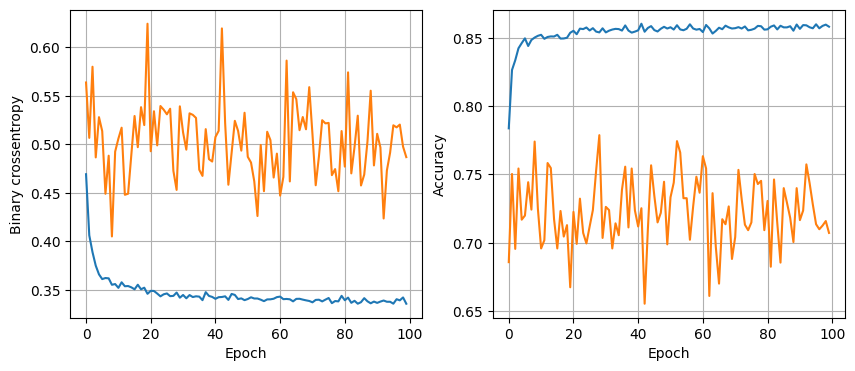

119/119 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.005, batch size 64


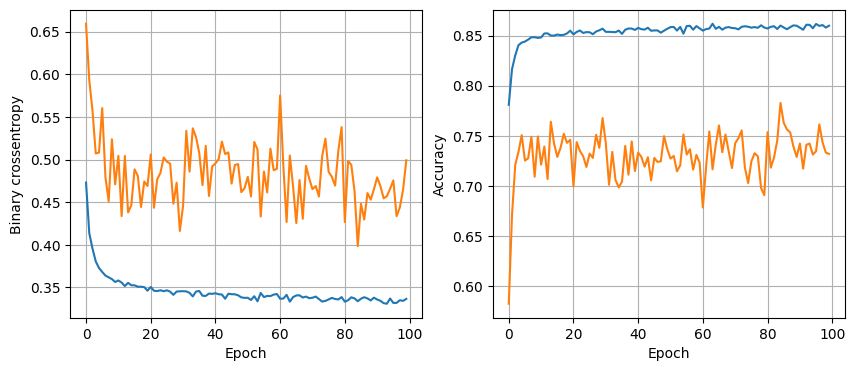

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8696
16 nodes, dropout 0.2, lr 0.005, batch size 128


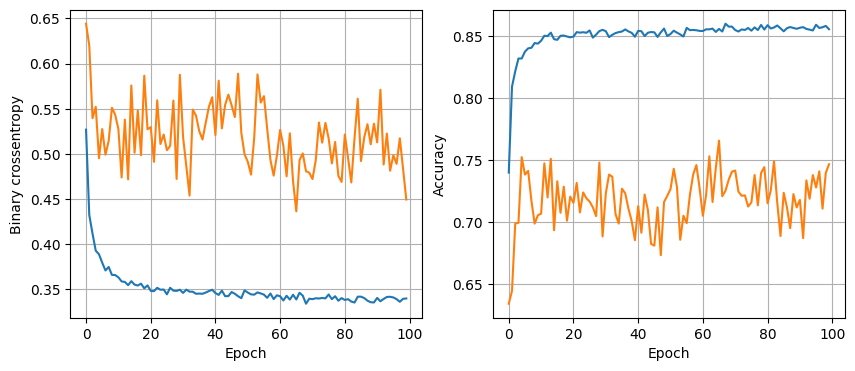

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.001, batch size 32


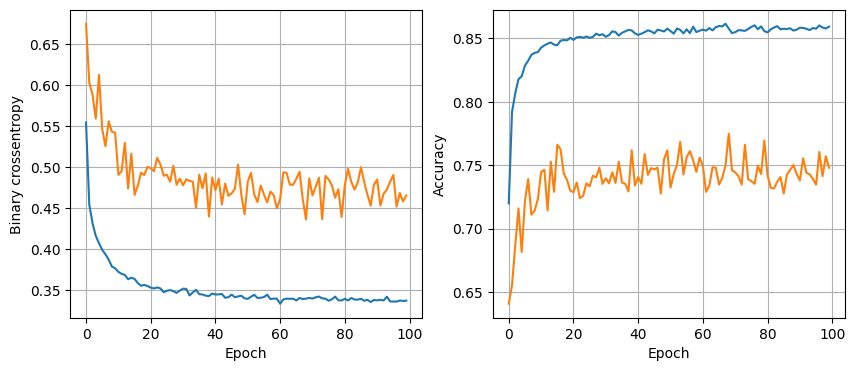

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8688
16 nodes, dropout 0.2, lr 0.001, batch size 64


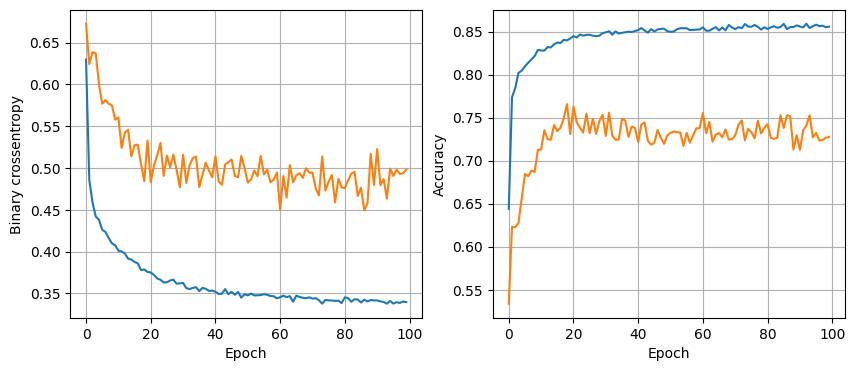

119/119 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.001, batch size 128


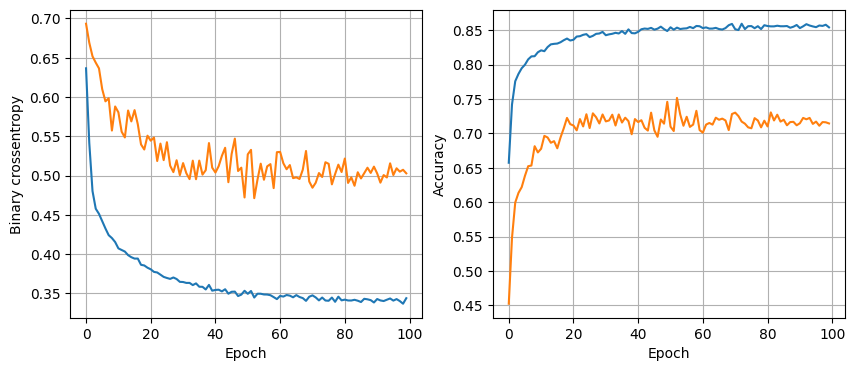

119/119 [==============================] - 0s 4ms/step - loss: 0.3191 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.01, batch size 32


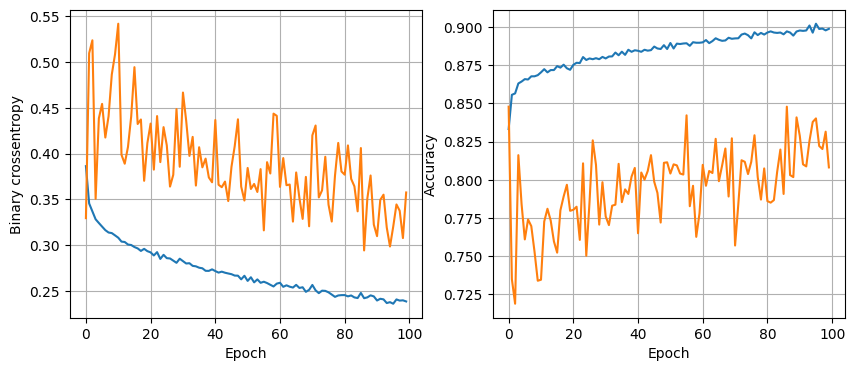

119/119 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.01, batch size 64


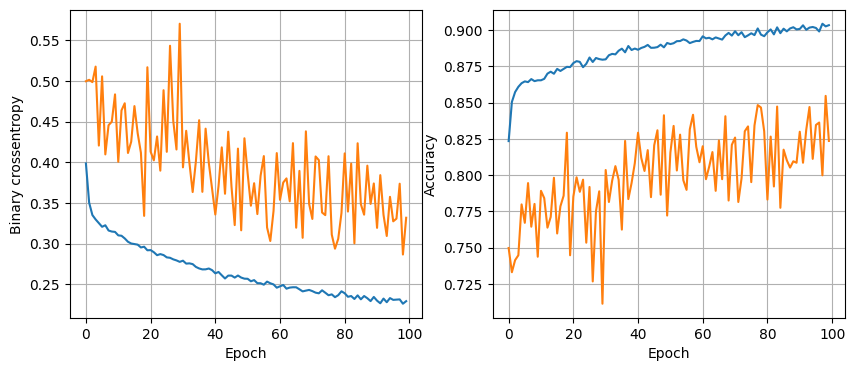

119/119 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.01, batch size 128


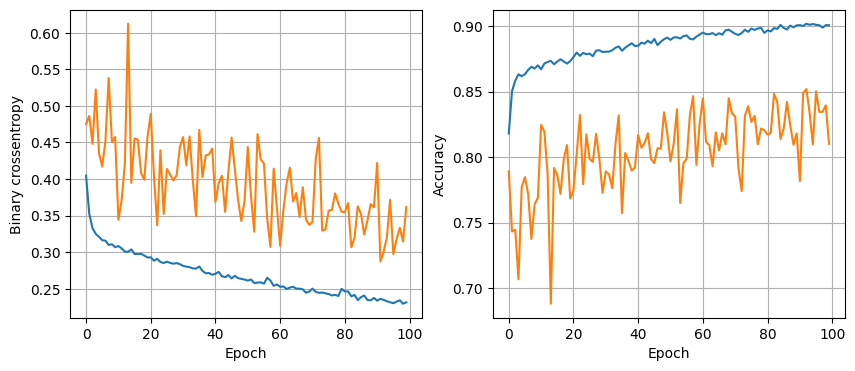

119/119 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.005, batch size 32


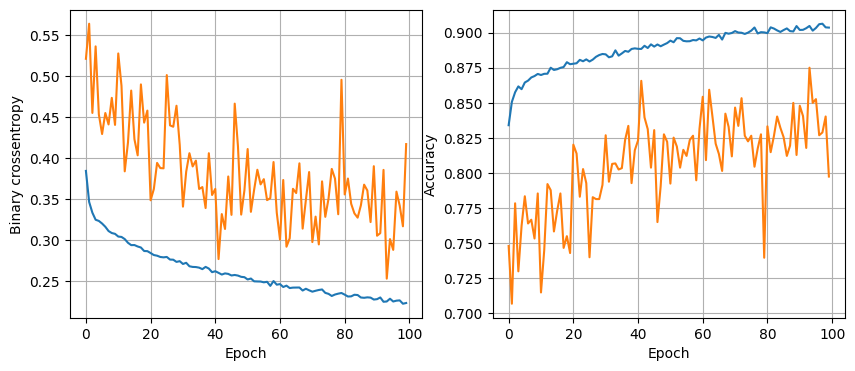

119/119 [==============================] - 1s 4ms/step - loss: 0.3964 - accuracy: 0.8559
32 nodes, dropout 0, lr 0.005, batch size 64


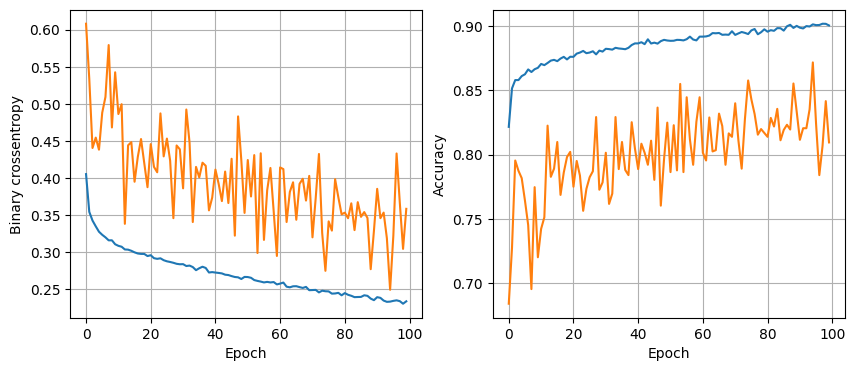

119/119 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 128


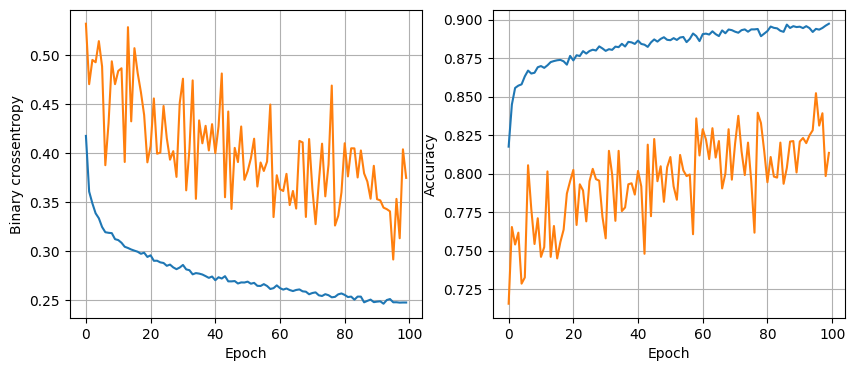

119/119 [==============================] - 1s 5ms/step - loss: 0.3440 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.001, batch size 32


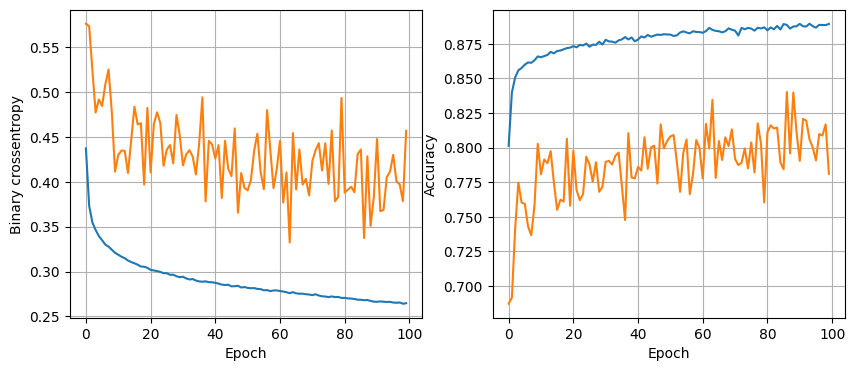

119/119 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.001, batch size 64


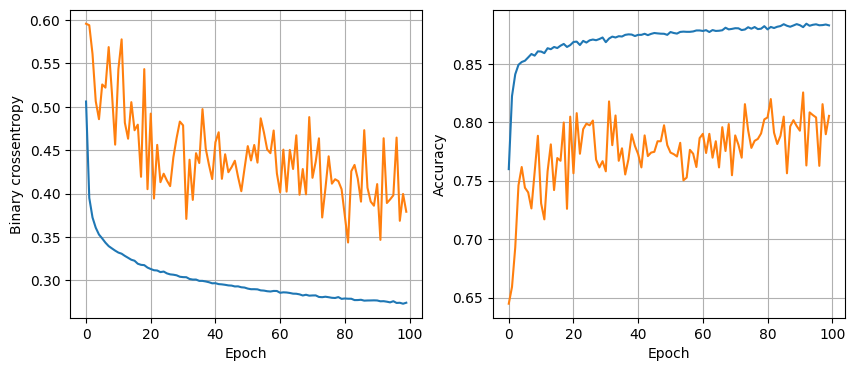

119/119 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8657
32 nodes, dropout 0, lr 0.001, batch size 128


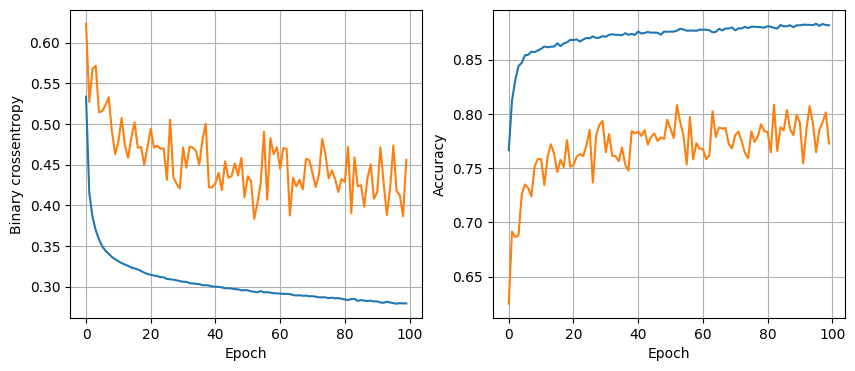

119/119 [==============================] - 1s 5ms/step - loss: 0.3125 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.01, batch size 32


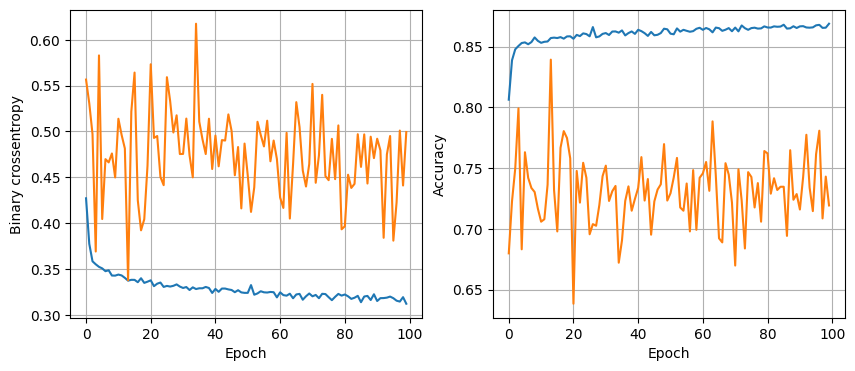

119/119 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.01, batch size 64


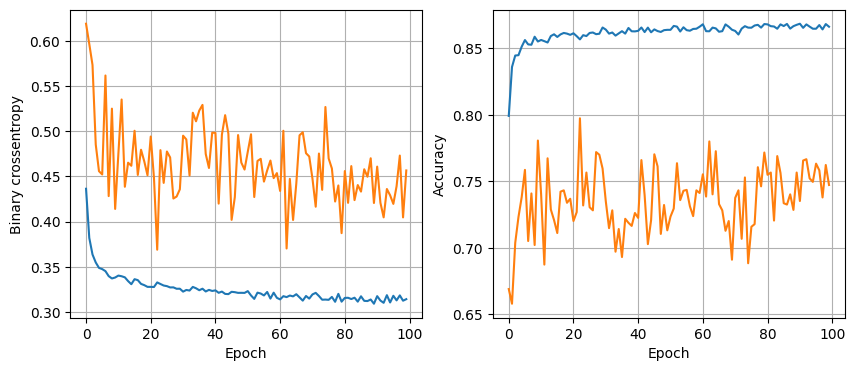

119/119 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch size 128


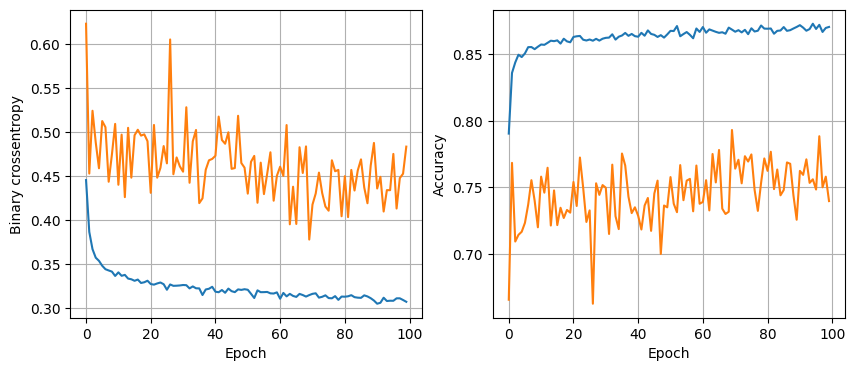

119/119 [==============================] - 0s 4ms/step - loss: 0.3035 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch size 32


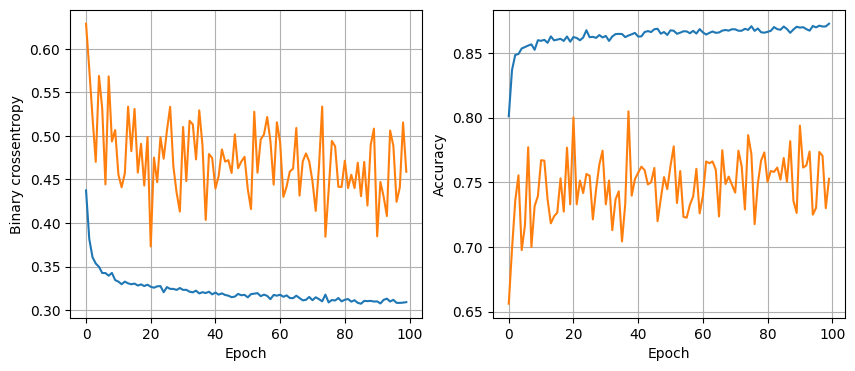

119/119 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.005, batch size 64


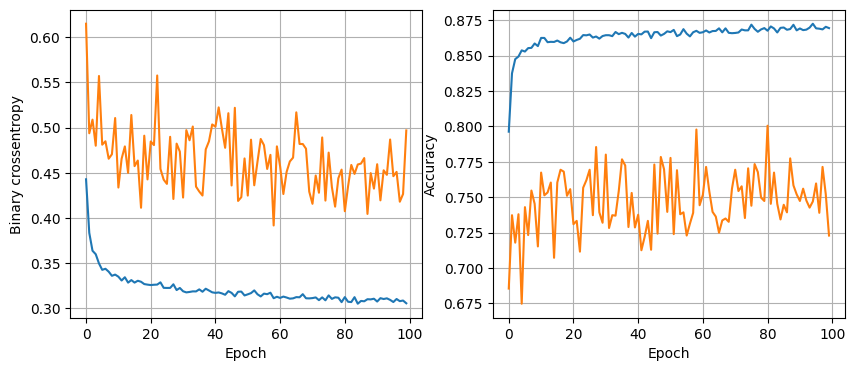

119/119 [==============================] - 1s 5ms/step - loss: 0.2984 - accuracy: 0.8754
32 nodes, dropout 0.2, lr 0.005, batch size 128


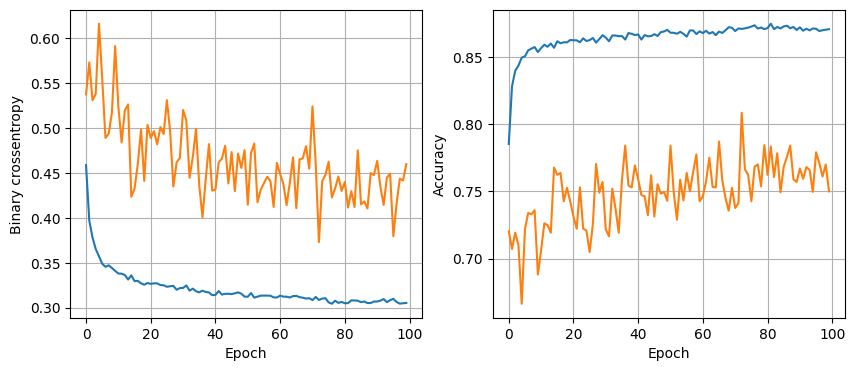

119/119 [==============================] - 1s 4ms/step - loss: 0.2982 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.001, batch size 32


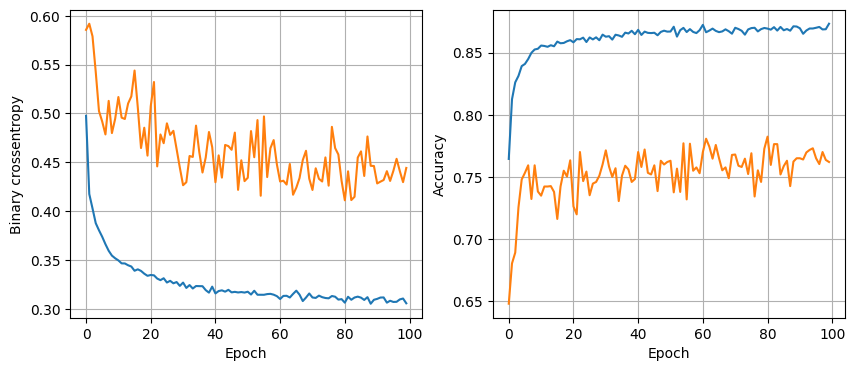

119/119 [==============================] - 1s 4ms/step - loss: 0.2982 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.001, batch size 64


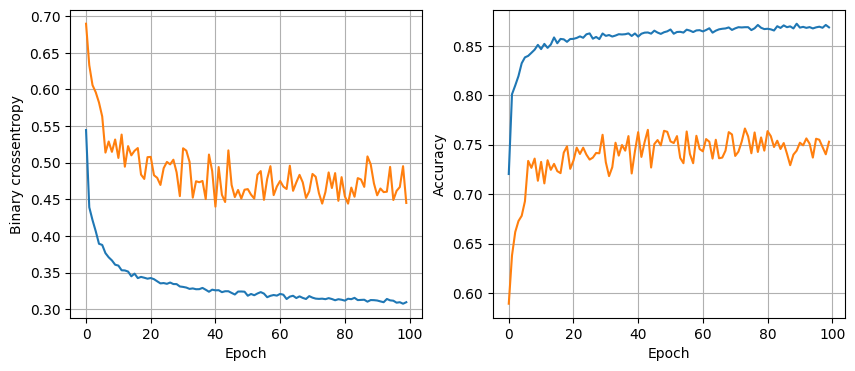

119/119 [==============================] - 0s 4ms/step - loss: 0.3020 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.001, batch size 128


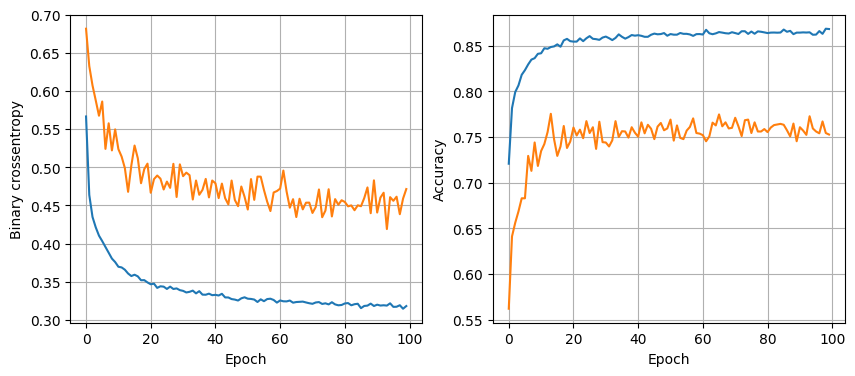

119/119 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.01, batch size 32


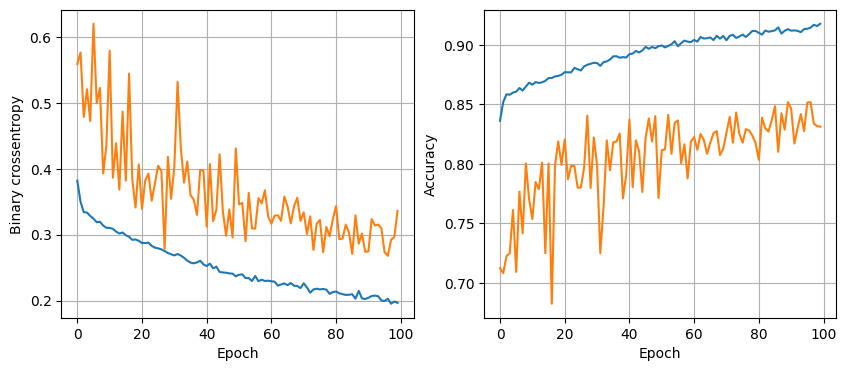

119/119 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.8675
64 nodes, dropout 0, lr 0.01, batch size 64


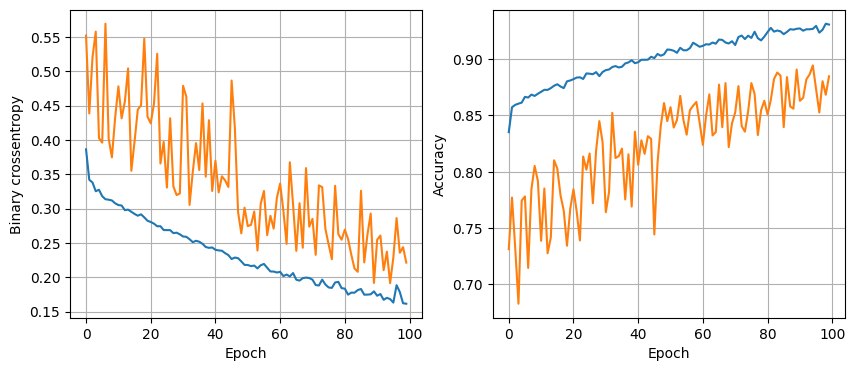

119/119 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.8615
64 nodes, dropout 0, lr 0.01, batch size 128


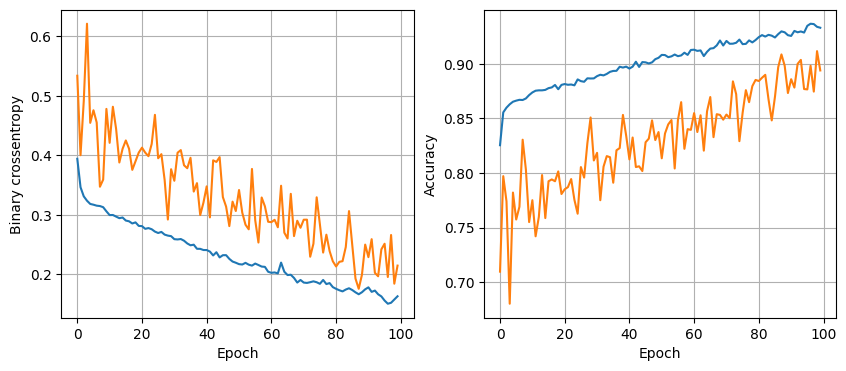

119/119 [==============================] - 1s 4ms/step - loss: 0.5683 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.005, batch size 32


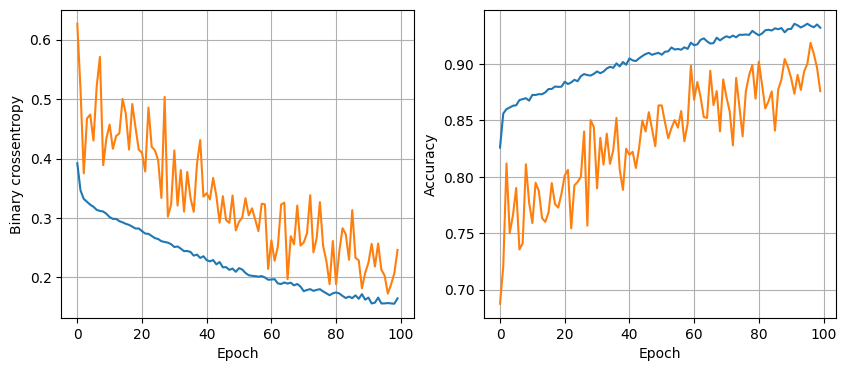

119/119 [==============================] - 1s 5ms/step - loss: 0.5826 - accuracy: 0.8549
64 nodes, dropout 0, lr 0.005, batch size 64


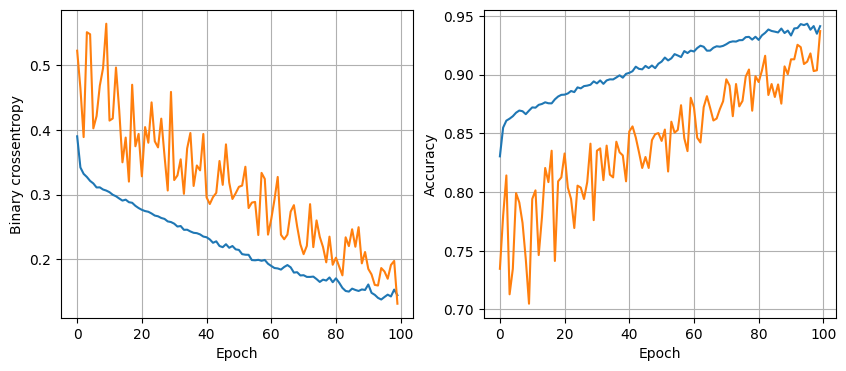

119/119 [==============================] - 0s 4ms/step - loss: 0.5671 - accuracy: 0.8483
64 nodes, dropout 0, lr 0.005, batch size 128


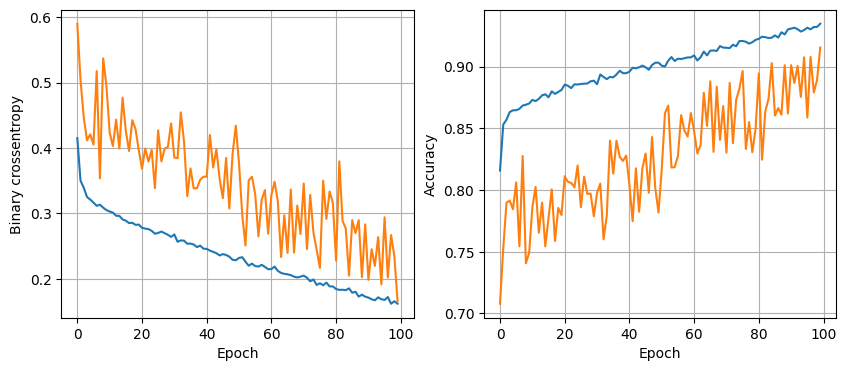

119/119 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8523
64 nodes, dropout 0, lr 0.001, batch size 32


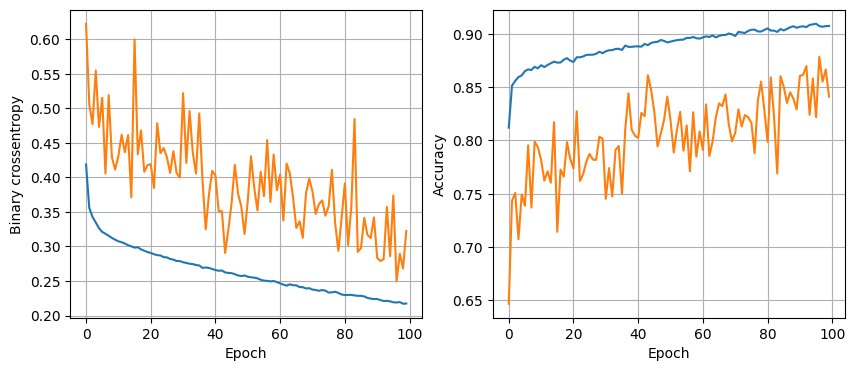

119/119 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8633
64 nodes, dropout 0, lr 0.001, batch size 64


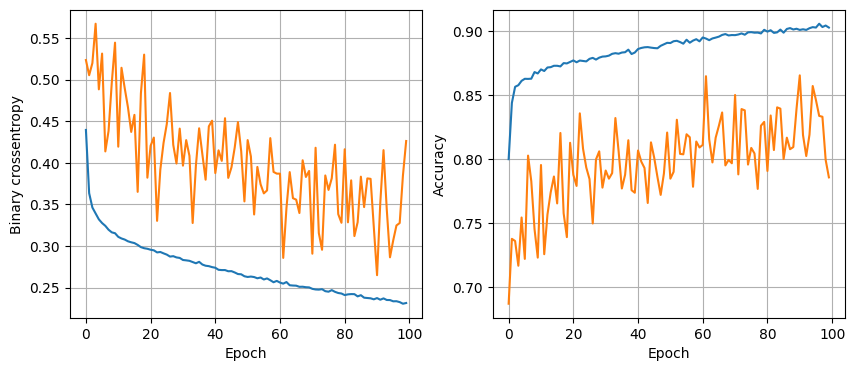

119/119 [==============================] - 0s 4ms/step - loss: 0.3361 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.001, batch size 128


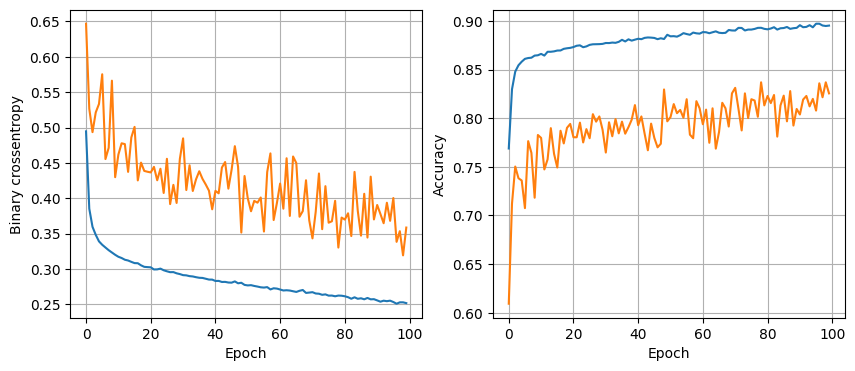

119/119 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8644
64 nodes, dropout 0.2, lr 0.01, batch size 32


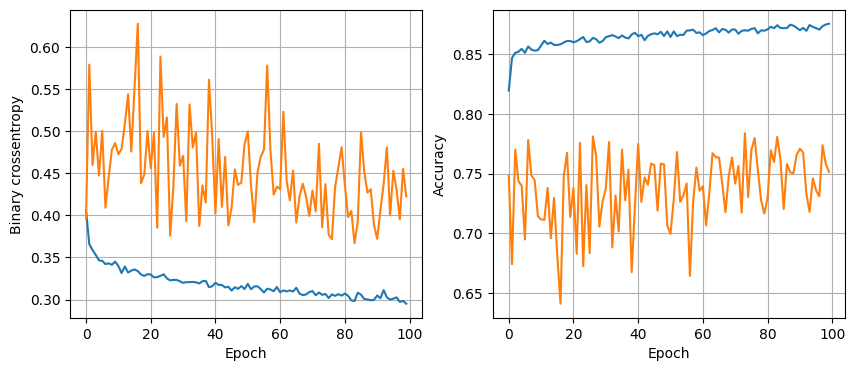

119/119 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.01, batch size 64


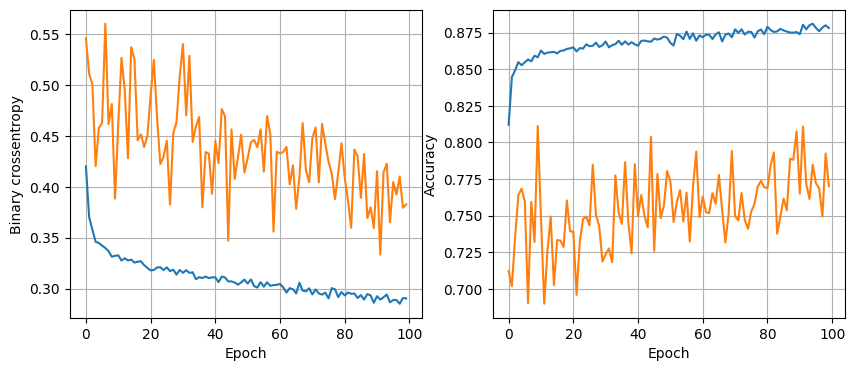

119/119 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch size 128


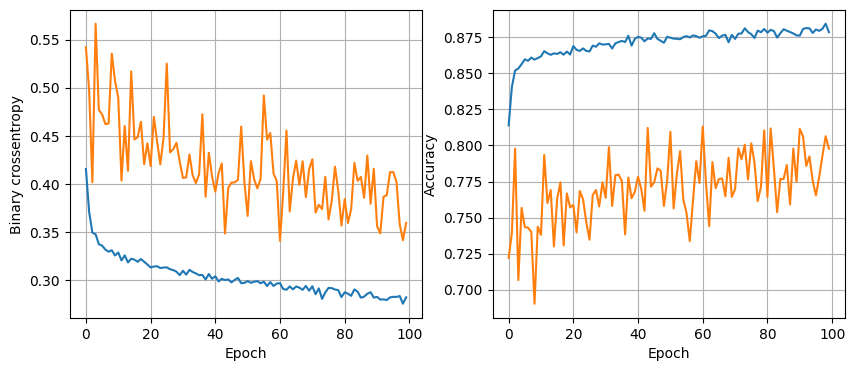

119/119 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8728
64 nodes, dropout 0.2, lr 0.005, batch size 32


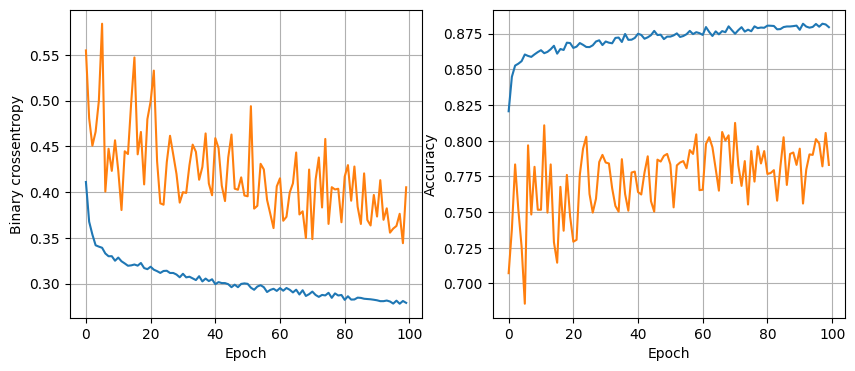

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.005, batch size 64


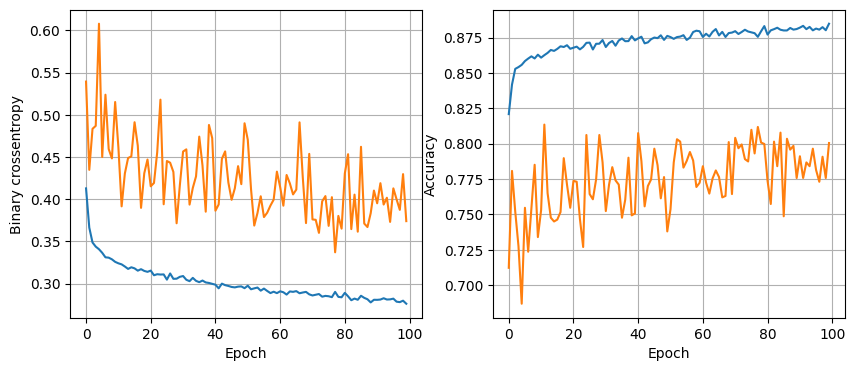

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.005, batch size 128


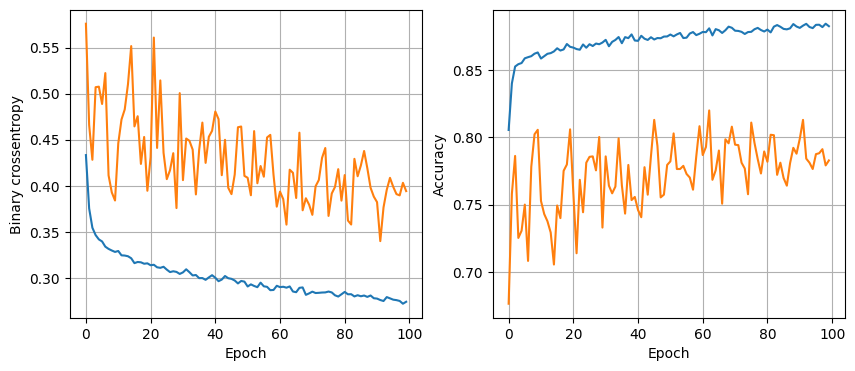

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.001, batch size 32


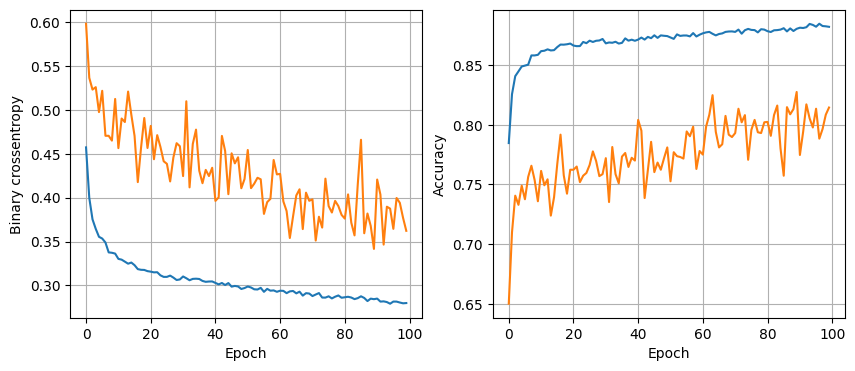

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.001, batch size 64


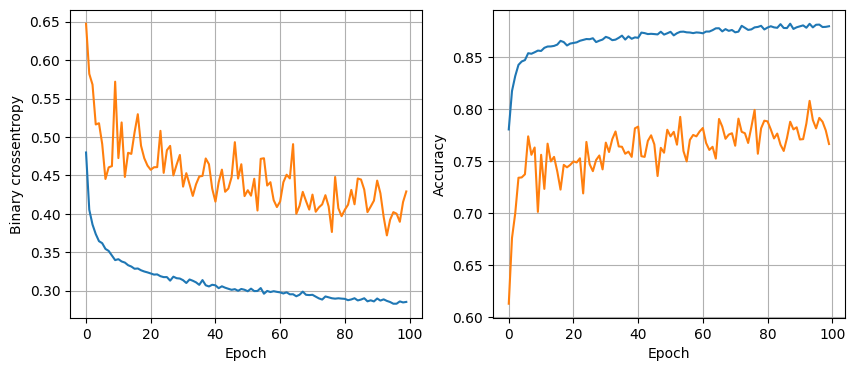

119/119 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.001, batch size 128


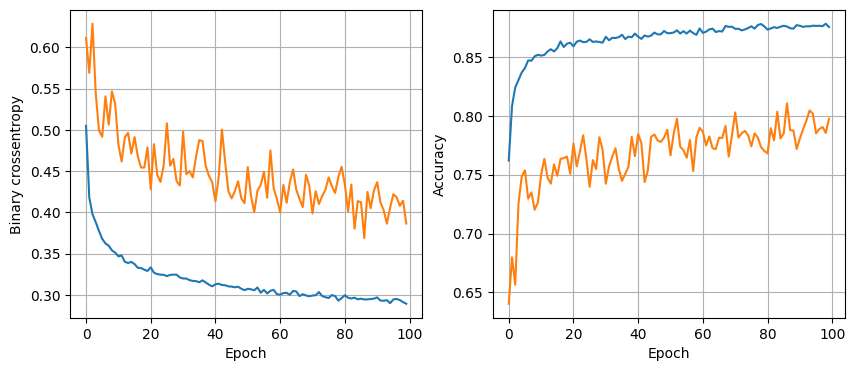

119/119 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8686
Best model parameters: {'num_nodes': 64, 'dropout_prob': 0.2, 'lr': 0.001, 'batch_size': 64}


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
best_model_params = {}

epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]  # Use [0] to get the loss value
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                    best_model_params = {
                        'num_nodes': num_nodes,
                        'dropout_prob': dropout_prob,
                        'lr': lr,
                        'batch_size': batch_size
                    }

# Now, you can access the best model parameters using the best_model_params dictionary
print("Best model parameters:", best_model_params)


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1407
           1       0.86      0.96      0.91      2397

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.87      0.87      3804

